# Evaluation of seasurface temperature

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date
import pyicon as pyic
import cartopy.crs as ccrs
import glob, os
import xarray as xr
import pandas as pd
import cartopy
ccrs_proj = ccrs.PlateCarree()
# import seawater as sw
#import datetime

#import multiprocessing
#from dask_jobqueue import SLURMCluster # Setting up distributed memories via slurm
#from dask.utils import format_bytes
#from dask.distributed import Client, LocalCluster, progress # Libaray to orchestrate distributed resources

#from tempfile import NamedTemporaryFile, TemporaryDirectory # Creating temporary Files/Dirs
#from getpass import getuser # Libaray to copy things
#from pathlib import Path # Object oriented libary to deal with paths

-----calc
sys glob os
numpy
netcdf
Done modules calc.
-----calc_xr
sys glob os
numpy
netcdf
xarray
Done modules calc.
-----tb
sys
json
numpy
scipy
netcdf datetime
matplotlib
mybreak
pnadas
xarray
done xarray
-----IconData
-----plotting
-----view
-----calc
-----calc_xr
-----tb
-----IconData
-----plotting
-----view
-----quickplots
-----quickplots


In [45]:
lon_reg = [-75, -55]
lat_reg = [33, 43]
clim = 0, 24

load data

### SMT-NATL

In [49]:
run      = 'ngSMT_tke'
savefig  = False
path_fig = '../pics/'
nnf      = 0
gname = 'smt'
#lev   = 'L128'

#path_data    = f'/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/????-??/'
#fpath_tgrid = '/mnt/lustre01/work/mh0287/users/leonidas/icon/submeso/grid/cell_grid-OceanOnly_SubmesoNA_2500m_srtm30-icon.nc'
fpath_tgrid  = '/home/mpim/m300602/work/icon/grids/smt/smt_tgrid.nc'
#fpath_Tri    = '/mnt/lustre01/work/mh0033/m300602/tmp/Tri.pkl'

path_grid     = f'/mnt/lustre01/work/mh0033/m300602/icon/grids/{gname}/'
path_ckdtree  = f'{path_grid}ckdtree/'
# fpath_ckdtree = f'{path_grid}ckdtree/rectgrids/{gname}_res0.30_180W-180E_90S-90N.npz'
fpath_ckdtree = '/mnt/lustre01/work/mh0033/m300602/proj_vmix/icon/icon_ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'
fpath_ckdtree_smt = fpath_ckdtree 
#month = '01'
#path_data = f'/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-{month}/{run}'
#fname = '_T_S_sp_001-016_20100115T010000Z.nc'

In [59]:
month = '01'
path_data = f'/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-{month}/{run}'
search_str = f'_T_S_sp_001-016_2010*.nc' 
flist1      = np.array(glob.glob(path_data+search_str))
flist1.sort()
month = '02'
path_data = f'/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-{month}/{run}'
search_str = f'_T_S_sp_001-016_2010*.nc' 
flist2      = np.array(glob.glob(path_data+search_str))
flist2.sort()
month = '03'
path_data = f'/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-{month}/{run}'
search_str = f'_T_S_sp_001-016_2010*.nc' 
flist3      = np.array(glob.glob(path_data+search_str))
flist3.sort()

flist = [*flist1, *flist2, *flist3]
flist.sort()

In [67]:
time0 = np.datetime64('2010-01-09T01:00:00')
dti = pd.date_range(time0, periods=984, freq="2h")
smt = xr.open_mfdataset(flist, combine='nested', concat_dim='time', parallel=True, chunks=dict(time=1))
#smt = smt.assign_coords({"clon": ("ncells", clon)})
#smt = smt.assign_coords({"clat": ("ncells", clat)})
smt = smt.assign_coords(time=dti)
#sst_smt = smt.T001_sp.isel(time=0)

In [68]:
smt

<xarray.Dataset>
Dimensions:  (time: 984, ncells: 59799625)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-09T01:00:00 ... 2010-03-31T23:00:00
Dimensions without coordinates: ncells
Data variables: (12/32)
    T001_sp  (time, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
    S001_sp  (time, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
    T002_sp  (time, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
    S002_sp  (time, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
    T003_sp  (time, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
    S003_sp  (time, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
    ...       ...
    T014_sp  (time, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
    S014_sp  (time, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
    T015_sp  (time, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
    S015_sp  (time, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
    T016_sp  (time, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
    S016_sp  (time, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.8.2 (http://mpimet...
    Conventions:          CF-1.6
    number_of_grid_used:  42
    uuidOfHGrid:          0d39853e-c26b-11e9-8454-0b16a6d45f73
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               git@gitlab.dkrz.de:icon/icon-oes.git@e7e7a45736e586...
    history:              /work/mh0287/users/leonidas/icon/icon-oes_ngSMT/int...
    references:           see MPIM/DWD publications
    comment:              Leonidas Linardakis (m300056) on m20180 (Linux 2.6....

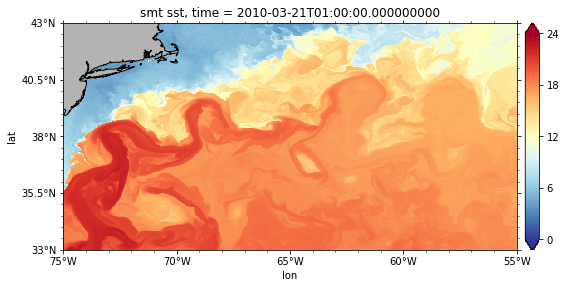

In [86]:
t = 71*12
A = smt.isel(time=t).T001_sp
 
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.5, fig_size_fac=2, projection=ccrs_proj, axlab_kw=None)
lon, lat, data = pyic.interp_to_rectgrid(A, fpath_ckdtree=fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)

ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, data, ax=ax, cax=cax, clim =clim, transform=ccrs_proj, rasterized=False)
ax.set_title(f'smt sst, time = {smt.time[t].data}')
ax.set_xlabel('lon')
ax.set_ylabel('lat')
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)

## R2B8

In [94]:
fpath_ckdtree = '/mnt/lustre01/work/mh0033/m300602/icon/grids/r2b8_oce_r0004/ckdtree/rectgrids/r2b8_oce_r0004_res0.10_180W-180E_90S-90N.nc'
path_data = '/work/mh0033/m211054/projects/icon/icon-oes-1.3.01/experiments/exp.ocean_era51h_r2b8_hel20218-ERA/outdata/'
search_str = f'exp.ocean_era51h_r2b8_hel20218-ERA_2010*.nc' 
flist      = np.array(glob.glob(path_data+search_str))
flist.sort()

In [97]:
r2b8 = xr.open_mfdataset(flist, combine='nested', concat_dim='time', parallel=True, chunks=dict(time=1))
sst_r2b8 = r2b8.isel(depth=0).to

In [115]:
sst_r2b8

<xarray.DataArray 'to' (time: 12, ncells: 3729001)>
dask.array<getitem, shape=(12, 3729001), dtype=float32, chunksize=(1, 3729001), chunktype=numpy.ndarray>
Coordinates:
    clon     (ncells) float32 dask.array<chunksize=(3729001,), meta=np.ndarray>
    clat     (ncells) float32 dask.array<chunksize=(3729001,), meta=np.ndarray>
    depth    float64 5.5
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2010-12-01
Dimensions without coordinates: ncells
Attributes:
    standard_name:                sea_water_potential_temperature
    long_name:                    sea water potential temperature
    units:                        deg C
    code:                         2
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

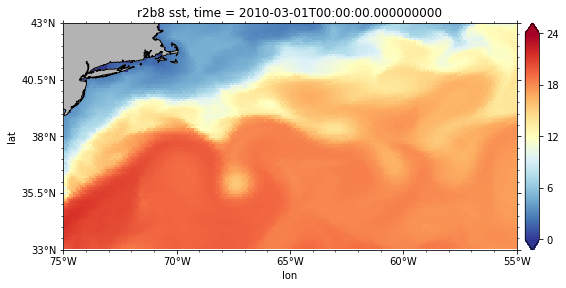

In [102]:
t=2
A = sst_r2b8.isel(time=t)
 
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.5, fig_size_fac=2, projection=ccrs_proj, axlab_kw=None)
sst_r2b8_inter = pyic.interp_to_rectgrid_xr(A, fpath_ckdtree=fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)

ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(sst_r2b8_inter.lon, sst_r2b8_inter.lat, sst_r2b8_inter, ax=ax, cax=cax, clim = clim, transform=ccrs_proj, rasterized=False)
ax.set_title(f'r2b8 sst, time = {sst_r2b8.time[t].data}')
ax.set_xlabel('lon')
ax.set_ylabel('lat')
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)

## satellite sst

Unfortunately, beginning with the v2019.0 reprocessing, quite some data based on the overpasses during the day are missing while those based on overpasses during the night are complete. For time-series analysis we recommend therefore to use the night-time data only; this is advisable anyways thanks to the reduced influence of the diurnal cycle when taking night-time data.

monthly here only for one timestep

In [118]:
path_data = '/pool/data/ICDC/ocean/modis_aqua_sst/DATA/monthly/2010/MODIS-AQUA__C6__SST_v2019.0__4km__20100101_20100131__UHAM-ICDC__fv0.02.nc'

In [119]:
sat = xr.open_dataset(path_data)


In [5]:
sst_sat = sat.where((sat.lat > lat_reg[0]) & (sat.lat < lat_reg[1]) & (sat.lon > lon_reg[0]) & (sat.lon < lon_reg[1]), drop=True)


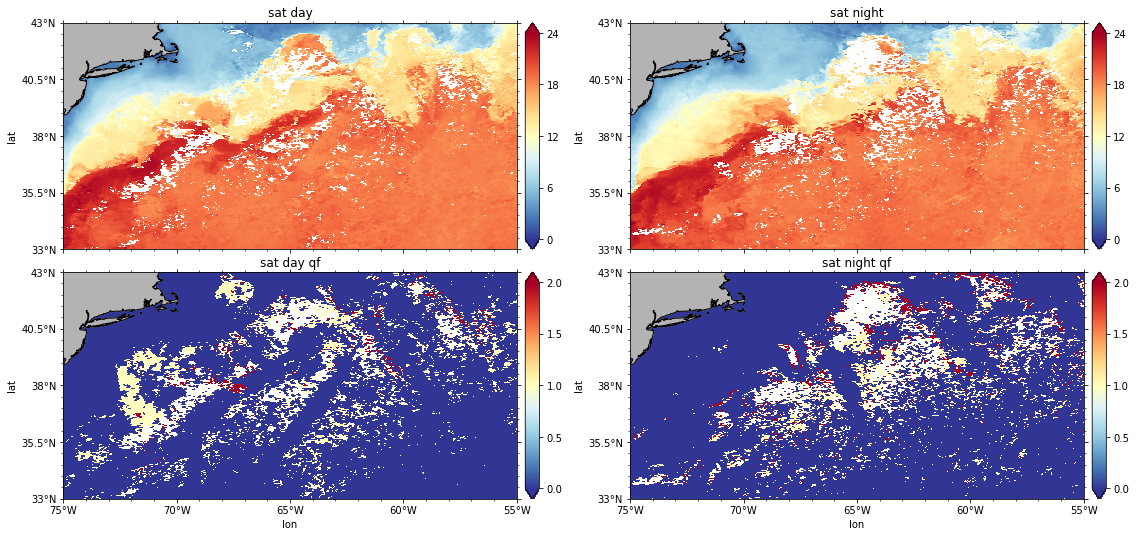

In [7]:
hca, hcb = pyic.arrange_axes(2, 2, plot_cb=True, asp=0.5, fig_size_fac=2, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(sst_sat.lon, sst_sat.lat, sst_sat.isel(time=0).sst_day, ax=ax, cax=cax, clim=clim, transform=ccrs_proj, rasterized=False)
ax.set_title('sat day')
#ax.set_xlabel('lon')
ax.set_ylabel('lat')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(sst_sat.lon, sst_sat.lat, sst_sat.isel(time=0).sst_night, ax=ax, cax=cax, clim=clim, transform=ccrs_proj, rasterized=False)
ax.set_title('sat night')
#ax.set_xlabel('lon')
ax.set_ylabel('lat')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(sst_sat.lon, sst_sat.lat, sst_sat.isel(time=0).sst_day_qf, ax=ax, cax=cax,  transform=ccrs_proj, rasterized=False)
ax.set_title('sat day qf')
ax.set_xlabel('lon')
ax.set_ylabel('lat')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(sst_sat.lon, sst_sat.lat, sst_sat.isel(time=0).sst_night_qf, ax=ax, cax=cax,  transform=ccrs_proj, rasterized=False)
ax.set_title('sat night qf')
ax.set_xlabel('lon')
ax.set_ylabel('lat')
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)

daily

In [126]:
path_data  = '/pool/data/ICDC/ocean/modis_aqua_sst/DATA/daily/2010/'
search_str = f'MODIS-AQUA__C6__SST_v2019.0__4km__2010*.nc' 
flist      = np.array(glob.glob(path_data+search_str))
flist.sort()

In [127]:
sata = xr.open_mfdataset(flist[:90], combine='nested', concat_dim='time', parallel=True, chunks=dict(time=1))
sata = sata.where((sata.lat > lat_reg[0]) & (sata.lat < lat_reg[1]) & (sata.lon > lon_reg[0]) & (sata.lon < lon_reg[1]), drop=True)
sst_sat = sata

/work/mh0033/u241317/miniconda3/envs/pyicon_py38/lib/python3.8/site-packages/xarray/core/indexing.py:1233: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


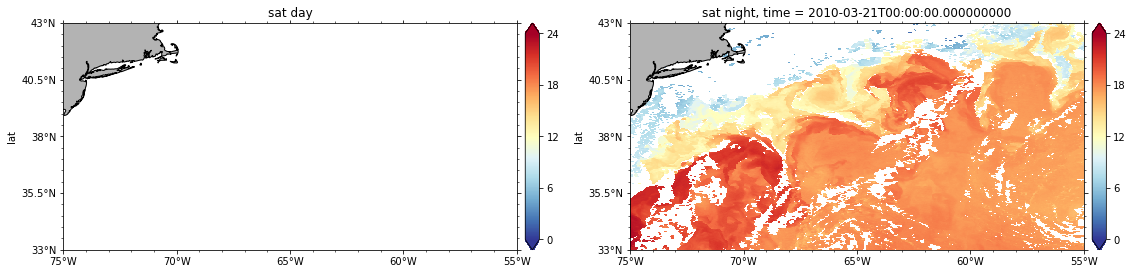

In [128]:

t=79

hca, hcb = pyic.arrange_axes(2, 1, plot_cb=True, asp=0.5, fig_size_fac=2, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(sst_sat.lon, sst_sat.lat, sst_sat.isel(time=t).sst_day, ax=ax, cax=cax, clim=clim, transform=ccrs_proj, rasterized=False)
ax.set_title('sat day')
#ax.set_xlabel('lon')
ax.set_ylabel('lat')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(sst_sat.lon, sst_sat.lat, sst_sat.isel(time=t).sst_night, ax=ax, cax=cax, clim=clim, transform=ccrs_proj, rasterized=False)
ax.set_title(f'sat night, time = {sst_sat.time[t].data}')
#ax.set_xlabel('lon')
ax.set_ylabel('lat')

for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)

/work/mh0033/u241317/miniconda3/envs/pyicon_py38/lib/python3.8/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/work/mh0033/u241317/miniconda3/envs/pyicon_py38/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


NotImplementedError: 'item' is not yet a valid method on dask arrays

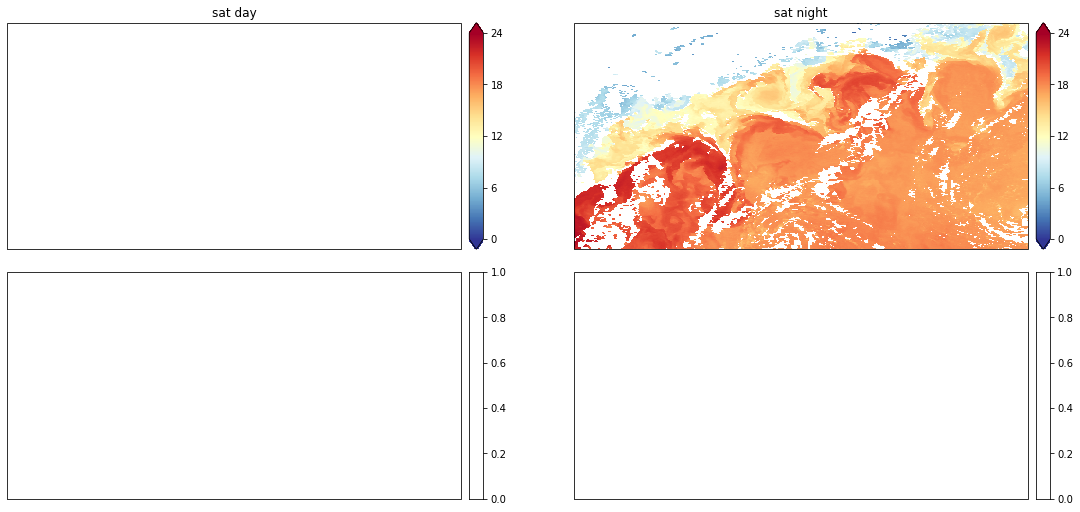

In [129]:
hca, hcb = pyic.arrange_axes(2, 2, plot_cb=True, asp=0.5, fig_size_fac=2, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(sst_sat.lon, sst_sat.lat, sst_sat.isel(time=t).sst_day, ax=ax, cax=cax, clim=clim, transform=ccrs_proj, rasterized=False)
ax.set_title('sat day')
#ax.set_xlabel('lon')
ax.set_ylabel('lat')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(sst_sat.lon, sst_sat.lat, sst_sat.isel(time=t).sst_night, ax=ax, cax=cax, clim=clim, transform=ccrs_proj, rasterized=False)
ax.set_title('sat night')
#ax.set_xlabel('lon')
ax.set_ylabel('lat')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(sst_sat.lon, sst_sat.lat, sst_sat.isel(time=t).sst_day_qf, ax=ax, cax=cax,  transform=ccrs_proj, rasterized=False)
ax.set_title('sat day qf')
ax.set_xlabel('lon')
ax.set_ylabel('lat')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(sst_sat.lon, sst_sat.lat, sst_sat.isel(time=t).sst_night_qf, ax=ax, cax=cax,  transform=ccrs_proj, rasterized=False)
ax.set_title('sat night qf')
ax.set_xlabel('lon')
ax.set_ylabel('lat')
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)

## plot together

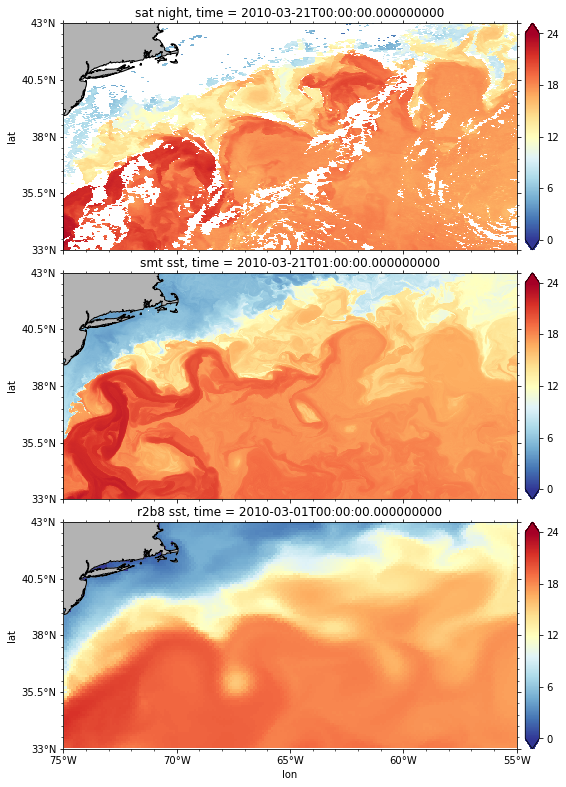

In [109]:
tsat = 79
tsmt = 71*12
tr2b8 = 2

hca, hcb = pyic.arrange_axes(1, 3, plot_cb=True, asp=0.5, fig_size_fac=2, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(sst_sat.lon, sst_sat.lat, sst_sat.isel(time=tsat).sst_night, ax=ax, cax=cax, clim=clim, transform=ccrs_proj, rasterized=False)
ax.set_title(f'sat night, time = {sst_sat.time[tsat].data}')
#ax.set_xlabel('lon')
ax.set_ylabel('lat')
 
ii+=1; ax=hca[ii]; cax=hcb[ii]
A = smt.isel(time=tsmt).T001_sp
#lon, lat, data = pyic.interp_to_rectgrid(A, fpath_ckdtree=fpath_ckdtree_smt, lon_reg=lon_reg, lat_reg=lat_reg)
pyic.shade(lon, lat, data, ax=ax, cax=cax, clim =clim, transform=ccrs_proj, rasterized=False)
ax.set_title(f'smt sst, time = {smt.time[tsmt].data}')
#ax.set_xlabel('lon')
ax.set_ylabel('lat')
 
ii+=1; ax=hca[ii]; cax=hcb[ii]
A = sst_r2b8.isel(time=tr2b8)
#sst_r2b8_inter = pyic.interp_to_rectgrid_xr(A, fpath_ckdtree=fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
pyic.shade(sst_r2b8_inter.lon, sst_r2b8_inter.lat, sst_r2b8_inter, ax=ax, cax=cax, clim = clim, transform=ccrs_proj, rasterized=False)
ax.set_title(f'r2b8 sst, time = {sst_r2b8.time[tr2b8].data}')
ax.set_xlabel('lon')
ax.set_ylabel('lat')
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)

is the r2b8 data averaged?
is there no option to get a clear day with more data points?